# Create AI API client in python

In [1]:
from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
import json

In [4]:
root_path = "/Users/I559573/Documents/D2V2.0_PREP/btp-ai-core-bootcamp/src/ai-models/defect-detection"

In [2]:
# Your service key JSON file relative to this notebook
aic_service_key_path = '/Users/I559573/AICore_Tutorial/files/aic_service_key.json'

# Loads the service key file
with open(aic_service_key_path) as ask:
    aic_service_key = json.load(ask)

# Creating an AI API client instance
ai_api_client = AIAPIV2Client(
    base_url = aic_service_key["serviceurls"]["AI_API_URL"] + "/v2", # The present AI API version is 2
    auth_url=  aic_service_key["url"] + "/oauth/token",
    client_id = aic_service_key['clientid'],
    client_secret = aic_service_key['clientsecret']
)

# Connect GitHub and Docker to SAP AI Core

In [20]:
git_setup_file_path = root_path + "/files/git_setup.json"

In [21]:
# Loads your git_setup.json
with open(git_setup_file_path) as gs:
    setup_json = json.load(gs)

# Connects your repo
repo_json = setup_json["repo"]
response = ai_api_client.rest_client.post(
    path="/admin/repositories",
    body={
        "name": repo_json["name"],
        "url": repo_json["url"],
        "username": repo_json["username"],
        "password": repo_json["password"]
    }
)
print(response)

{'message': 'Repository has been on-boarded.'}


In [11]:
# Loads your git_setup.json
with open(git_setup_file_path) as gs:
    setup_json = json.load(gs)
    
# Registers the directory as app
app_json = setup_json["app"]
response = ai_api_client.rest_client.post(
    path="/admin/applications",
    body={
        "applicationName": app_json["applicationName"],
        "repositoryUrl": app_json["repositoryUrl"],
        "revision": app_json["revision"],
        "path": app_json["path"]
    }
)

ai_api_client.rest_client.delete(
    path="/admin/repositories/aicore-test-calabria"
)

ai_api_client.rest_client.delete(
    path="/admin/applications/aicore-test-app-calabria"
)

In [12]:
ai_api_client.rest_client.get(
    path="/admin/repositories"
)

{'count': 1,
 'resources': [{'name': 'aicore-test-calabria',
   'status': 'COMPLETED',
   'url': 'https://github.com/calabria/aicore-test'}]}

In [13]:
ai_api_client.rest_client.get(
    path="/admin/applications"
)

{'count': 2,
 'resources': [{'application_name': 'aicore-test-app-calabria',
   'path': 'workflows',
   'repository_url': 'https://github.com/calabria/aicore-test',
   'revision': 'HEAD'},
  {'application_name': 'defect-det-app-calabria',
   'path': 'workflows_image',
   'repository_url': 'https://github.com/calabria/aicore-test',
   'revision': 'HEAD'}]}

In [126]:
app_name = "defect-det-app-calabria"

ai_api_client.rest_client.get(
    path=f"/admin/applications/{app_name}/status"
)

{'health_status': 'Healthy',
 'message': 'successfully synced (all tasks run)',
 'reconciled_at': '2022-02-21T17:52:30Z',
 'source': {'path': 'workflows_image',
  'repourl': 'https://github.com/calabria/aicore-test',
  'revision': '39bce658944b58e5b3110107643c265623dc30ed'},
 'sync_finished_at': '2022-02-21T17:49:28Z',
 'sync_ressources_status': [{'kind': 'ServingTemplate',
   'message': 'servingtemplate.ai.sap.com/image-clf-infer-tutorial unchanged',
   'name': 'image-clf-infer-tutorial',
   'status': 'Synced'},
  {'kind': 'WorkflowTemplate',
   'message': 'workflowtemplate.argoproj.io/image-clf-train-tutorial configured',
   'name': 'image-clf-train-tutorial',
   'status': 'Synced'}],
 'sync_started_at': '2022-02-21T17:49:26Z',
 'sync_status': 'Synced'}

# Connect Docker to SAP AI Core

In [22]:
docker_secret_file_path = root_path + '/files/docker_secret.json'
#
# NO CHANGES REQUIRED BELOW
#
# Loads the json file
with open(docker_secret_file_path) as dsf:
    docker_secret = json.load(dsf)

response = ai_api_client.rest_client.post(
    path="/admin/dockerRegistrySecrets",
    body={
        "name": docker_secret["name"],
        "data": docker_secret["data"]
    }
)
print(response)

{'message': 'Secret exists'}


In [5]:
ai_api_client.rest_client.get(
    path=f"/admin/dockerRegistrySecrets"
)

{'count': 1, 'resources': [{'name': 'docker-registry-secret'}]}

Create and upload the docker images

docker login docker.io -u yoshidj

docker build -t yoshidj/image-clf-train:0.0.1 .

docker push docker.io/yoshidj/image-clf-train:0.0.1

# Create Resource Group and Connect AWS S3 to SAP AI Core

In [26]:
ai_api_client.rest_client.post(
    path="/admin/resourceGroups",
    body={
        "resourceGroupId": "defect-det" # Name of your resource group
    }
)

{'resource_group_id': 'defect-det',
 'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
 'zone_id': ''}

In [27]:
ai_api_client.rest_client.get(
    path=f"/admin/resourceGroups"
)

{'count': 3,
 'resources': [{'labels': [],
   'resource_group_id': 'calabria',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': ''},
  {'labels': [],
   'resource_group_id': 'defect-det',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': ''},
  {'labels': [],
   'resource_group_id': 'default',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810'}]}

In [28]:
# Loads your service key
s3_service_key_path = root_path + "/files/s3_service_key.json"

# Loads the service key file
with open(s3_service_key_path) as s3sk:
    s3_service_key = json.load(s3sk)

default_secret = {
    "name": "default", # Name of the connection
    "type": "S3",
    "endpoint": s3_service_key["host"],
    "bucket": s3_service_key["bucket"],
    "pathPrefix": "ai_core_tutorial",
    "region": s3_service_key["region"],
    "data": {
        "AWS_ACCESS_KEY_ID": s3_service_key["access_key_id"],
        "AWS_SECRET_ACCESS_KEY": s3_service_key["secret_access_key"]
    }
}

# Call the api
ai_api_client.rest_client.post(
    path="/admin/objectStoreSecrets",
    body = default_secret, # defined above
    resource_group = "defect-det"
)

{'message': 'secret has been been created'}

In [29]:
ai_api_client.rest_client.get(
    path="/admin/objectStoreSecrets",
    resource_group = "defect-det"
)

{'count': 1,
 'resources': [{'metadata': {'serving.kubeflow.org/s3-endpoint': 's3.amazonaws.com',
    'serving.kubeflow.org/s3-region': 'eu-central-1',
    'serving.kubeflow.org/s3-usehttps': '',
    'serving.kubeflow.org/s3-verifyssl': '',
    'storage.ai.sap.com/bucket': 'books-dataset',
    'storage.ai.sap.com/endpoint': 's3.amazonaws.com',
    'storage.ai.sap.com/path_prefix': 'ai_core_tutorial',
    'storage.ai.sap.com/region': 'eu-central-1',
    'storage.ai.sap.com/type': 'S3'},
   'name': 'default'}]}

secret_name = "default"

ai_api_client.rest_client.delete(
    path=f"/admin/objectStoreSecrets/{secret_name}",
    resource_group = "calabria"
)

# Train Execution of ML Model

In [2]:
import sys, os
import json
import requests
import base64
import time
import yaml
from IPython.display import clear_output
from pprint import pprint

from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
from ai_api_client_sdk.models.artifact import Artifact
from ai_api_client_sdk.models.status import Status
from ai_api_client_sdk.models.target_status import TargetStatus
from ai_api_client_sdk.models.parameter_binding import ParameterBinding
from ai_api_client_sdk.models.input_artifact_binding import InputArtifactBinding

In [5]:
resource_group = "defect-det"  # Must be created before

aic_service_key = root_path + "/files/aic_service_key.json" # ENSURE YOU HAVE THE FILE PLACED CORRECTLY
with open(aic_service_key) as ask:
    aic_s_k = json.load(ask)

# NO CHANGES REQUIRED BELOW
#
ai_api_v2_client = AIAPIV2Client(
    base_url=aic_s_k["serviceurls"]["AI_API_URL"] + "/v2/lm",
    auth_url=aic_s_k["url"] + "/oauth/token",
    client_id=aic_s_k['clientid'],
    client_secret=aic_s_k['clientsecret'],
    resource_group=resource_group)

Check the available scenarios

In [6]:
scenario_resp = ai_api_v2_client.scenario.query(resource_group)

print("Scenarios")
print("---" * 20)
for idx, scenario in enumerate(scenario_resp.resources):
    print(f"Scenario ID {idx + 1} -> [{scenario.id}]")

Scenarios
------------------------------------------------------------
Scenario ID 1 -> [text-clf-tutorial]
Scenario ID 2 -> [image-clf-tutorial]


Register training data as artifact

In [7]:
# NO CHANGES REQUIRED BELOW
#
# Load training_workflow.yaml
training_workflow_file = root_path + "/workflows/training_workflow_tutorial.yaml"
with open(training_workflow_file) as twf:
    training_workflow = yaml.safe_load(twf)
#
# Load scenario id from train_workflow.yaml
scenario_id = training_workflow['metadata']['labels']['scenarios.ai.sap.com/id']
#
# Set the artifact configuration
artifact = {
        "name": "tutorial-train-data", # Modifiable Name
        "kind": Artifact.Kind.DATASET,
        "url": "ai://default/data",
        "description": "Light guide plate dataset",
        "scenario_id": scenario_id
    }
# Store the artifact response to retrieve the id for the training configuration
artifact_resp = ai_api_v2_client.artifact.create(**artifact)
print(f"Artifacts registered for {scenario_id} scenario!")
pprint(vars(artifact_resp))
#
# Checks if the message contains expected string
assert artifact_resp.message == 'Artifact acknowledged'

Artifacts registered for image-clf-tutorial scenario!
{'id': 'e86e648a-3805-4600-b4f1-a5e9c4811352',
 'message': 'Artifact acknowledged',
 'url': 'ai://default/data'}


Create training configuration

In [247]:
input_artifact_name = training_workflow['spec']['templates'][0]['inputs']['artifacts'][0]['name']
executable_name = training_workflow['metadata']['name']

artifact_binding = {
    "key": input_artifact_name,
    "artifact_id": artifact_resp.id
}

train_configuration = {
    "name": "dev-tutorial-training-configuration",
    "scenario_id": scenario_id,
    "executable_id": executable_name,
    "parameter_bindings": [],
    "input_artifact_bindings": [ InputArtifactBinding(**artifact_binding) ]
}

# store the configuration response to access the id to create an execution
train_config_resp = ai_api_v2_client.configuration.create(**train_configuration)
pprint(vars(train_config_resp))

assert train_config_resp.message == 'Configuration created'

print("Configuration created for running the training")

{'id': 'e31121d8-730d-4d3c-807d-a65b1974a705',
 'message': 'Configuration created'}
Configuration created for running the training


Create training execution

In [248]:
execution_resp = ai_api_v2_client.execution.create(train_config_resp.id)
pprint(vars(execution_resp))

{'id': 'e0776f366b77c48f',
 'message': 'Execution scheduled',
 'status': <Status.UNKNOWN: 'UNKNOWN'>}


Observe training status

In [ ]:
status = None
while status != Status.COMPLETED and status != Status.DEAD:
    # Sleep for 5 secs to avoid overwhelming the API with requests
    time.sleep(5)
    # Clear outputs to reduce clutter
    clear_output(wait=True)

    execution = ai_api_v2_client.execution.get(execution_resp.id)
    status = execution.status
    print('...... execution status ......', flush=True)
    print(f"Training status: {execution.status}")
    print(f"Training status details: {execution.status_details}")


if execution.status == Status.COMPLETED:
    print(f"Training complete for execution [{execution_resp.id}]!")
    output_artifact = execution.output_artifacts[0]
    output = {
        "id": output_artifact.id,
        "name": output_artifact.name,
        "url": output_artifact.url
    }
    with open('training_output.json', 'w') as fp:
        json.dump(output, fp)

...... execution status ......
Training status: Status.RUNNING
Training status details: {'details': [{'container_name': 'main', 'exit_code': '', 'last_log_messages': 'Error pulling container main logs', 'message': '', 'pod_name': 'e0776f366b77c48f', 'ready': False}, {'container_name': 'wait', 'exit_code': '', 'last_log_messages': 'Error pulling container wait logs', 'message': '', 'pod_name': 'e0776f366b77c48f', 'ready': False}], 'workflow_info': [{'exit_code': '', 'id': 'e0776f366b77c48f', 'message': 'PodInitializing', 'name': 'e0776f366b77c48f', 'outputs': '', 'phase': 'Pending', 'type': 'Pod'}]}


# Metrics and performance

In [175]:
filter_string = "executionId eq '" + execution_resp.id + "'"
metric_resp = ai_api_v2_client.metrics.query(execution_ids=execution_resp.id)

for m in metric_resp.resources:
    for metric in m.metrics:
        print(metric.name)
        print(metric.value)

Model Accuracy
0.15493923425674438


In [176]:
all_metrics = []
for m in metric_resp.resources:
    for custom_info in m.custom_info:
        #print(custom_info.name)
        #print(custom_info.value)
        all_metrics.append(custom_info.value)

In [246]:
import ast
import re
import numpy as np

training_metrics = ast.literal_eval(all_metrics[0])
confusion_matrix = ast.literal_eval(all_metrics[1])
#print(training_metrics[0].get("loss"))
#print(confusion_matrix[0].get("actual label - 0"))
#print(confusion_matrix[1].get("actual label - 1"))

a = confusion_matrix[0].get("actual label - 0")
b = confusion_matrix[1].get("actual label - 1")

a = [int(x) for x in re.split('[^0-9]', a) if x]
b = [int(x) for x in re.split('[^0-9]', b) if x]
#print(a)
#print(b)

cnf_matrix = np.array([a, b])
print(cnf_matrix)

[[47  1]
 [ 3 49]]


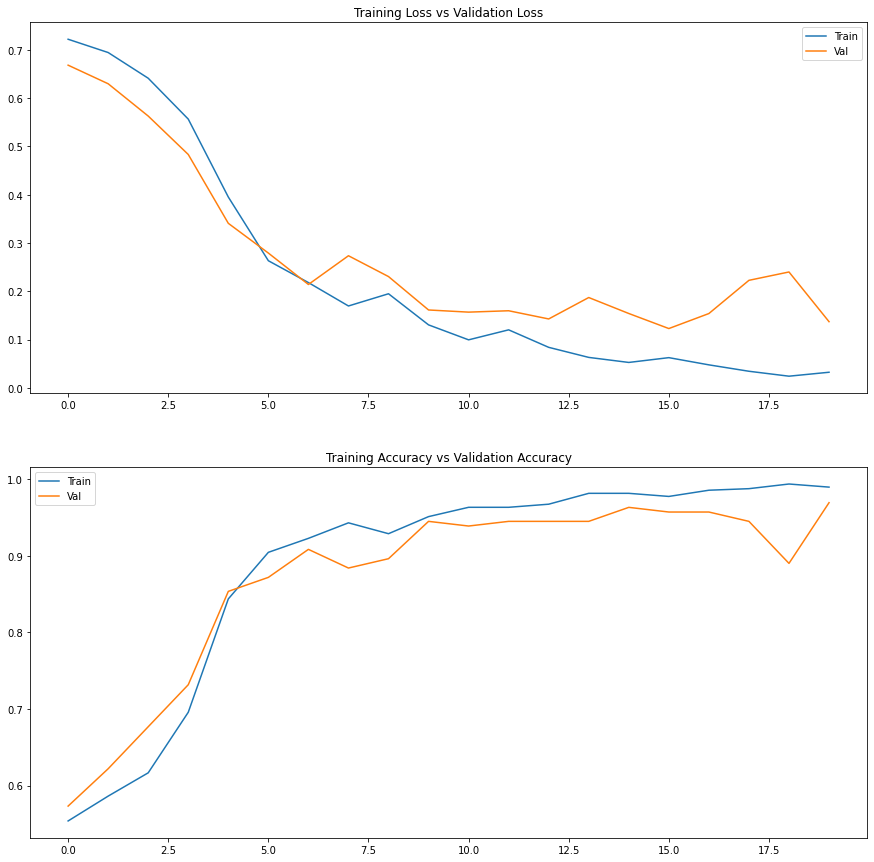

In [180]:
import matplotlib
import matplotlib.pyplot as plt
import itertools

fig, axs = plt.subplots(2, 1, figsize=(15,15))

a = ast.literal_eval(training_metrics[0].get("loss"))
b = ast.literal_eval(training_metrics[1].get("val_loss"))
c = ast.literal_eval(training_metrics[2].get("accuracy"))
d = ast.literal_eval(training_metrics[3].get("val_accuracy"))

axs[0].plot(a)
axs[0].plot(b)
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(c)
axs[1].plot(d)
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [191]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


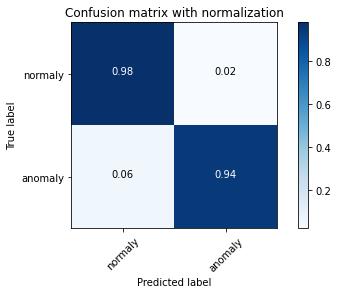

In [245]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["normaly","anomaly"], normalize=True,
                      title='Confusion matrix with normalization')

# Deploy ML Model

In [77]:
serving_workflow_file = root_path + "workflows/serving_workflow_tutorial.yaml"
with open(serving_workflow_file) as swf:
    serving_workflow = yaml.safe_load(swf)

scenario_id = serving_workflow['metadata']['labels']['scenarios.ai.sap.com/id']
input_artifact_name = serving_workflow['spec']['inputs']['artifacts'][0]['name']
executable_name = serving_workflow['metadata']['name']

training_output = 'training_output.json'
with open(training_output) as to:
    serving_input = json.load(to)

In [78]:
artifact_binding = {
    "key": input_artifact_name,
    "artifact_id": serving_input["id"]
}

serve_configuration = {
    "name": "dev-tutorial-serving-configuration",
    "scenario_id": scenario_id,
    "executable_id": executable_name,
    "parameter_bindings": [],
    "input_artifact_bindings": [ InputArtifactBinding(**artifact_binding) ]
}

serve_config_resp = ai_api_v2_client.configuration.create(**serve_configuration)

assert serve_config_resp.message == 'Configuration created'

pprint(vars(serve_config_resp))
print("configuration for serving the model created")

{'id': '9abd26c2-601a-4372-961f-f25ec53a8980',
 'message': 'Configuration created'}
configuration for serving the model created


In [79]:
deployment_resp = ai_api_v2_client.deployment.create(serve_config_resp.id)
pprint(vars(deployment_resp))

{'deployment_url': '',
 'id': 'ddd9442de50c25ad',
 'message': 'Deployment scheduled.',
 'status': <Status.UNKNOWN: 'UNKNOWN'>}


In [80]:
# Poll deployment status
status = None
while status != Status.RUNNING and status != Status.DEAD:
    time.sleep(5)
    clear_output(wait=True)
    deployment = ai_api_v2_client.deployment.get(deployment_resp.id)
    status = deployment.status
    print('...... deployment status ......', flush=True)
    print(deployment.status)
    pprint(deployment.status_details)

    if deployment.status == Status.RUNNING:
        print(f"Deployment with {deployment_resp.id} complete!")

# Allow some time for deployment URL to get ready
time.sleep(10)

...... deployment status ......
Status.RUNNING
None
Deployment with ddd9442de50c25ad complete!


# Using deployed ML model

In [81]:
# Preparing the input for inference
# prediciton: compliment
test_input = {
    "text": "I loved this food, it was very good"
}

endpoint = f"{deployment.deployment_url}/v1/models/imagemodel:predict"
headers = {"Authorization": ai_api_v2_client.rest_client.get_token(),
           'ai-resource-group': resource_group,
           "Content-Type": "application/json"}
response = requests.post(endpoint, headers=headers, json=test_input)

print('Inference result:', response.json())
pprint(vars(response))

Inference result: {'predictions': 'compliment'}
{'_content': b'{"predictions":"compliment"}\n',
 '_content_consumed': True,
 '_next': None,
 'connection': <requests.adapters.HTTPAdapter object at 0x1042ebd90>,
 'cookies': <RequestsCookieJar[]>,
 'elapsed': datetime.timedelta(microseconds=812606),
 'encoding': 'utf-8',
 'headers': {'content-length': '29', 'content-type': 'application/json', 'date': 'Wed, 16 Feb 2022 16:13:57 GMT', 'server': 'istio-envoy', 'x-envoy-upstream-service-time': '378'},
 'history': [],
 'raw': <urllib3.response.HTTPResponse object at 0x10420e0d0>,
 'reason': 'OK',
 'request': <PreparedRequest [POST]>,
 'status_code': 200,
 'url': 'https://api.ai.prod.eu-central-1.aws.ml.hana.ondemand.com/v2/inference/deployments/ddd9442de50c25ad/v1/models/textmodel:predict'}


In [82]:
# Preparing the input for inference
# prediction: complaint
test_input = {
    "text": "I hated this food, it was very bad"
}
endpoint = f"{deployment.deployment_url}/v1/models/textmodel:predict"
headers = {"Authorization": ai_api_v2_client.rest_client.get_token(),
           'ai-resource-group': resource_group,
           "Content-Type": "application/json"}
response = requests.post(endpoint, headers=headers, json=test_input)

print('Inference result:', response.json())
pprint(vars(response))

Inference result: {'predictions': 'complaint'}
{'_content': b'{"predictions":"complaint"}\n',
 '_content_consumed': True,
 '_next': None,
 'connection': <requests.adapters.HTTPAdapter object at 0x1042eb340>,
 'cookies': <RequestsCookieJar[]>,
 'elapsed': datetime.timedelta(microseconds=86340),
 'encoding': 'utf-8',
 'headers': {'content-length': '28', 'content-type': 'application/json', 'date': 'Wed, 16 Feb 2022 16:14:55 GMT', 'server': 'istio-envoy', 'x-envoy-upstream-service-time': '9'},
 'history': [],
 'raw': <urllib3.response.HTTPResponse object at 0x104293940>,
 'reason': 'OK',
 'request': <PreparedRequest [POST]>,
 'status_code': 200,
 'url': 'https://api.ai.prod.eu-central-1.aws.ml.hana.ondemand.com/v2/inference/deployments/ddd9442de50c25ad/v1/models/textmodel:predict'}


# Stop deployed model

In [83]:
delete_resp = ai_api_v2_client.deployment.modify(deployment_resp.id,
                                                 target_status=TargetStatus.STOPPED)
status = None
while status != Status.STOPPED:
    time.sleep(5)
    clear_output(wait=True)
    deployment = ai_api_v2_client.deployment.get(deployment_resp.id)
    status = deployment.status
    print('...... killing deployment ......', flush=True)
    print(f"Deployment status: {deployment.status}")

...... killing deployment ......
Deployment status: Status.STOPPED
